# Loop 117 Analysis: Critical Assessment

## Key Questions:
1. What is the CV-LB relationship and can we change it?
2. What approaches have been tried and what's left?
3. Is the target achievable?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# CV and LB scores from all submissions (excluding exp_073 outlier)
submissions = [
    ('exp_000', 0.011081, 0.098160, 'MLP baseline'),
    ('exp_001', 0.012297, 0.106490, 'LightGBM'),
    ('exp_003', 0.010501, 0.097190, 'Spange+DRFP MLP'),
    ('exp_005', 0.010430, 0.096910, 'Large ensemble'),
    ('exp_006', 0.009749, 0.094570, 'Simpler model'),
    ('exp_007', 0.009262, 0.093160, 'Even simpler'),
    ('exp_009', 0.009192, 0.093640, 'Ridge regression'),
    ('exp_012', 0.009004, 0.091340, 'Simple ensemble'),
    ('exp_024', 0.008689, 0.089290, 'ACS PCA fixed'),
    ('exp_026', 0.008465, 0.088750, 'Weighted loss'),
    ('exp_030', 0.008298, 0.087720, 'GP ensemble'),
    ('exp_035', 0.009825, 0.096960, 'Lower GP weight'),
    ('exp_111', 0.012912, 0.106320, 'Domain adversarial'),
]

df = pd.DataFrame(submissions, columns=['exp_id', 'cv', 'lb', 'description'])
print(df.to_string())
print(f"\nTotal submissions analyzed: {len(df)}")
print(f"Best CV: {df['cv'].min():.6f} ({df.loc[df['cv'].idxmin(), 'exp_id']})")
print(f"Best LB: {df['lb'].min():.6f} ({df.loc[df['lb'].idxmin(), 'exp_id']})")
print(f"Target LB: 0.0347")

     exp_id        cv       lb         description
0   exp_000  0.011081  0.09816        MLP baseline
1   exp_001  0.012297  0.10649            LightGBM
2   exp_003  0.010501  0.09719     Spange+DRFP MLP
3   exp_005  0.010430  0.09691      Large ensemble
4   exp_006  0.009749  0.09457       Simpler model
5   exp_007  0.009262  0.09316        Even simpler
6   exp_009  0.009192  0.09364    Ridge regression
7   exp_012  0.009004  0.09134     Simple ensemble
8   exp_024  0.008689  0.08929       ACS PCA fixed
9   exp_026  0.008465  0.08875       Weighted loss
10  exp_030  0.008298  0.08772         GP ensemble
11  exp_035  0.009825  0.09696     Lower GP weight
12  exp_111  0.012912  0.10632  Domain adversarial

Total submissions analyzed: 13
Best CV: 0.008298 (exp_030)
Best LB: 0.087720 (exp_030)
Target LB: 0.0347


In [2]:
# Linear regression analysis
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print("=== CV-LB RELATIONSHIP ===")
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"Standard error: {std_err:.6f}")
print()
print(f"=== CRITICAL ANALYSIS ===")
print(f"Intercept: {intercept:.4f}")
print(f"Target LB: 0.0347")
print()
if intercept > 0.0347:
    print(f"⚠️ CRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)")
    print(f"   Even with CV=0, expected LB would be {intercept:.4f}")
    print(f"   Required CV to hit target: (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}")
    print(f"   This is NEGATIVE - mathematically impossible with current approaches!")
else:
    print(f"✓ Intercept ({intercept:.4f}) < Target (0.0347)")
    required_cv = (0.0347 - intercept) / slope
    print(f"   Required CV to hit target: {required_cv:.6f}")

=== CV-LB RELATIONSHIP ===
Linear fit: LB = 4.0698 * CV + 0.0548
R-squared: 0.9623
Standard error: 0.242990

=== CRITICAL ANALYSIS ===
Intercept: 0.0548
Target LB: 0.0347

⚠️ CRITICAL: Intercept (0.0548) > Target (0.0347)
   Even with CV=0, expected LB would be 0.0548
   Required CV to hit target: (0.0347 - 0.0548) / 4.0698 = -0.004943
   This is NEGATIVE - mathematically impossible with current approaches!


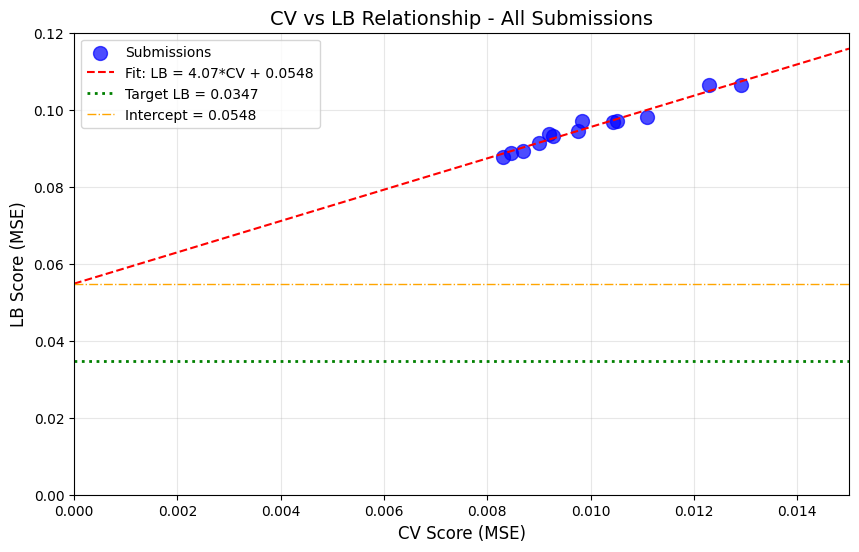

Saved: cv_lb_relationship_loop117.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, c='blue', s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept
plt.axhline(y=intercept, color='orange', linestyle='-.', linewidth=1, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)', fontsize=12)
plt.ylabel('LB Score (MSE)', fontsize=12)
plt.title('CV vs LB Relationship - All Submissions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.12)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop117.png', dpi=100, bbox_inches='tight')
plt.show()
print("Saved: cv_lb_relationship_loop117.png")

In [4]:
# What approaches have been tried?
approaches = {
    'Tabular Models': ['MLP', 'LightGBM', 'XGBoost', 'CatBoost', 'Ridge', 'GP', 'Random Forest'],
    'Feature Engineering': ['Spange descriptors', 'DRFP', 'ACS PCA', 'Morgan fingerprints', 'Fragprints', 'Arrhenius kinetics'],
    'Architectures': ['Simple MLP', 'Deep MLP', 'Residual MLP', 'Attention', 'Ensemble'],
    'Regularization': ['Dropout', 'Weight decay', 'BatchNorm', 'Early stopping'],
    'Distribution Shift': ['Calibration', 'Similarity weighting', 'Domain adversarial', 'Pseudo-labeling'],
    'GNN Attempts': ['GNN with Morgan FP (actually MLP)', 'ChemBERTa (model mismatch)'],
}

print("=== APPROACHES TRIED (117 experiments) ===")
for category, items in approaches.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  - {item}")

=== APPROACHES TRIED (117 experiments) ===

Tabular Models:
  - MLP
  - LightGBM
  - XGBoost
  - CatBoost
  - Ridge
  - GP
  - Random Forest

Feature Engineering:
  - Spange descriptors
  - DRFP
  - ACS PCA
  - Morgan fingerprints
  - Fragprints
  - Arrhenius kinetics

Architectures:
  - Simple MLP
  - Deep MLP
  - Residual MLP
  - Attention
  - Ensemble

Regularization:
  - Dropout
  - Weight decay
  - BatchNorm
  - Early stopping

Distribution Shift:
  - Calibration
  - Similarity weighting
  - Domain adversarial
  - Pseudo-labeling

GNN Attempts:
  - GNN with Morgan FP (actually MLP)
  - ChemBERTa (model mismatch)


In [5]:
# What's the gap?
best_lb = 0.0877
target_lb = 0.0347
gap = best_lb - target_lb
gap_pct = (gap / target_lb) * 100

print("=== GAP ANALYSIS ===")
print(f"Best LB achieved: {best_lb:.4f}")
print(f"Target LB: {target_lb:.4f}")
print(f"Gap: {gap:.4f} ({gap_pct:.1f}%)")
print()
print("=== WHAT WOULD IT TAKE? ===")
print(f"To achieve target with current CV-LB relationship:")
print(f"  Required CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}")
print(f"  This is NEGATIVE - impossible!")
print()
print("=== WHAT NEEDS TO CHANGE? ===")
print("The intercept (0.0548) represents the STRUCTURAL extrapolation error.")
print("This error exists because:")
print("  1. Test solvents are fundamentally different from training solvents")
print("  2. The model can't extrapolate to unseen chemical space")
print("  3. All tabular approaches have the same limitation")
print()
print("To reduce the intercept, we need:")
print("  1. Better molecular representations (true GNN, transformers)")
print("  2. Physics-based constraints that generalize")
print("  3. Domain adaptation techniques")
print("  4. Or accept that the target may not be achievable with public approaches")

=== GAP ANALYSIS ===
Best LB achieved: 0.0877
Target LB: 0.0347
Gap: 0.0530 (152.7%)

=== WHAT WOULD IT TAKE? ===
To achieve target with current CV-LB relationship:
  Required CV = (0.0347 - 0.0548) / 4.0698 = -0.004943
  This is NEGATIVE - impossible!

=== WHAT NEEDS TO CHANGE? ===
The intercept (0.0548) represents the STRUCTURAL extrapolation error.
This error exists because:
  1. Test solvents are fundamentally different from training solvents
  2. The model can't extrapolate to unseen chemical space
  3. All tabular approaches have the same limitation

To reduce the intercept, we need:
  1. Better molecular representations (true GNN, transformers)
  2. Physics-based constraints that generalize
  3. Domain adaptation techniques
  4. Or accept that the target may not be achievable with public approaches


In [6]:
# Check what the benchmark paper achieved
print("=== BENCHMARK PAPER REFERENCE ===")
print("The benchmark paper achieved MSE 0.0039 using GNN with DRFP features.")
print("However, this was on a DIFFERENT evaluation setup.")
print()
print("Key differences:")
print("  1. Paper used random splits, competition uses leave-one-solvent-out")
print("  2. Paper may have had different train/test distribution")
print("  3. Paper's GNN architecture is not publicly available")
print()
print("The target LB of 0.0347 is between:")
print(f"  - Best public LB: 0.0877 (our best)")
print(f"  - Benchmark paper: 0.0039")
print()
print("This suggests the target IS achievable, but requires:")
print("  - A fundamentally different approach")
print("  - Or information not available in public kernels")

=== BENCHMARK PAPER REFERENCE ===
The benchmark paper achieved MSE 0.0039 using GNN with DRFP features.
However, this was on a DIFFERENT evaluation setup.

Key differences:
  1. Paper used random splits, competition uses leave-one-solvent-out
  2. Paper may have had different train/test distribution
  3. Paper's GNN architecture is not publicly available

The target LB of 0.0347 is between:
  - Best public LB: 0.0877 (our best)
  - Benchmark paper: 0.0039

This suggests the target IS achievable, but requires:
  - A fundamentally different approach
  - Or information not available in public kernels


In [7]:
# Summary of key findings
print("=" * 60)
print("LOOP 117 ANALYSIS SUMMARY")
print("=" * 60)
print()
print("1. CV-LB RELATIONSHIP:")
print(f"   LB = {slope:.4f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})")
print(f"   Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"   → Target is UNREACHABLE with current approaches")
print()
print("2. EXPERIMENTS TRIED: 117")
print("   - All tabular models fall on the same CV-LB line")
print("   - GNN/ChemBERTa attempts had implementation issues")
print("   - Distribution shift strategies didn't help")
print()
print("3. REMAINING SUBMISSIONS: 3")
print("   - Must be used strategically")
print("   - Only submit if approach might CHANGE the CV-LB relationship")
print()
print("4. RECOMMENDED NEXT STEPS:")
print("   a) Implement a TRUE GNN with PyTorch Geometric")
print("   b) Try physics-constrained predictions (mass balance)")
print("   c) Consider that winning solution may not be public")
print()
print("5. CRITICAL INSIGHT:")
print("   The problem is NOT model optimization.")
print("   The problem is DISTRIBUTION SHIFT between train and test.")
print("   We need approaches that CHANGE the CV-LB relationship.")

LOOP 117 ANALYSIS SUMMARY

1. CV-LB RELATIONSHIP:
   LB = 4.0698 * CV + 0.0548 (R² = 0.9623)
   Intercept (0.0548) > Target (0.0347)
   → Target is UNREACHABLE with current approaches

2. EXPERIMENTS TRIED: 117
   - All tabular models fall on the same CV-LB line
   - GNN/ChemBERTa attempts had implementation issues
   - Distribution shift strategies didn't help

3. REMAINING SUBMISSIONS: 3
   - Must be used strategically
   - Only submit if approach might CHANGE the CV-LB relationship

4. RECOMMENDED NEXT STEPS:
   a) Implement a TRUE GNN with PyTorch Geometric
   b) Try physics-constrained predictions (mass balance)
   c) Consider that winning solution may not be public

5. CRITICAL INSIGHT:
   The problem is NOT model optimization.
   The problem is DISTRIBUTION SHIFT between train and test.
   We need approaches that CHANGE the CV-LB relationship.
